# INF-616 - Tarefa 2

Professor: Jacques Wainer -- wainer@ic.unicamp.br  
Monitor: Lucas David -- ra188972@students.ic.unicamp.br

Instituto de Computação - Unicamp  
2018

## Classificação multi-classe

In [3]:
from __future__ import print_function

import numpy as np
from sklearn import metrics, datasets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(42)

samples in train: 449
samples in test: 899
features: 64
classes: 10

Some of the samples in digits:


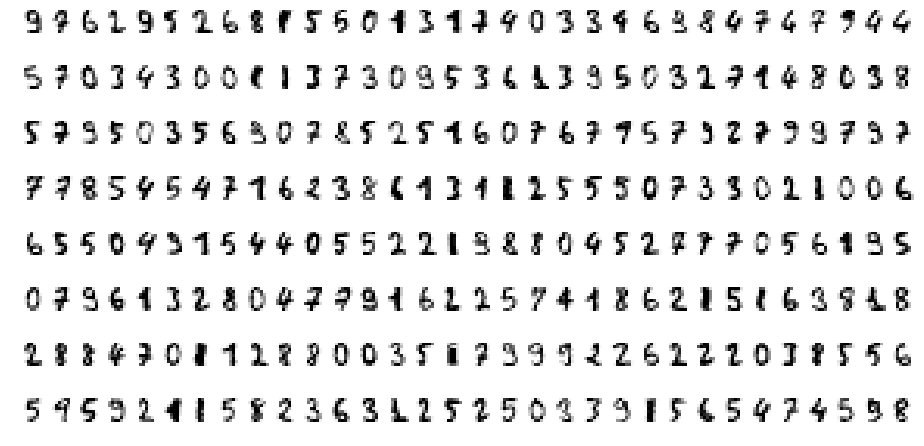

In [4]:
x, y = datasets.load_digits(return_X_y=True)
x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                    test_size=.5)
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train,
                                                      test_size=1 / 2)
print('samples in train: %i' % x_train.shape[0],
      'samples in test: %i' % x_test.shape[0],
      'features: %i' % x_train.shape[1],
      'classes: %i' % (np.max(y_train) + 1),
      sep='\n', end='\n\n')
print('Some of the samples in digits:')
_ = plt.figure(figsize=(16, 8))
for ix in range(8  * 32):
    plt.subplot(8, 32, ix + 1)
    plt.imshow(x_train[ix].reshape(8, 8), cmap='Greys')
    plt.axis('off')

**Teste múltiplos *hiper-parâmetros* e otimize um modelo a fim de corretamente classificar as amostras no primeiro conjunto de validação de dígitos**

In [7]:
from sklearn.svm import SVC

trials = [{'C': 1e-3, 'kernel': 'rbf'},
          {'C': 1e-2, 'kernel': 'rbf'},
          {'C': 1e-1, 'kernel': 'rbf'},
          {'C': 1e-3, 'kernel': 'poly'},
          {'C': 1e-2, 'kernel': 'poly'},
          {'C': 1e-1, 'kernel': 'poly'},
          {'C': 1e-3, 'kernel': 'sigmoid'},
          {'C': 1e-2, 'kernel': 'sigmoid'},
          {'C': 1e-1, 'kernel': 'sigmoid'}]

SVC_GAMMA        = 0.001
SVC_RANDOM_STATE = 13

metric = metrics.accuracy_score


def find_best_params(trials, metric, train, valid):
    scores = []
    for params in trials:
        model = SVC(C=params["C"], kernel=params["kernel"],
                    gamma=SVC_GAMMA, random_state=SVC_RANDOM_STATE)
        model.fit(train[0], train[1])
        
        score = metric(valid[1], model.predict(valid[0]))
        scores.append(score)
    return scores

scores = find_best_params(trials, metric, (x_train, y_train), (x_valid, y_valid))
best_ix = np.argmax(scores)
best_params = trials[best_ix]

print('best parameters are', best_params, 'with score', scores[best_ix])

0.0668151447661
0.0668151447661
0.866369710468
0.654788418708
0.953229398664
0.966592427617


0.0668151447661
0.0668151447661
0.0668151447661
best parameters are {'C': 0.1, 'kernel': 'poly'} with score 0.966592427617


**Este modelo manteve a pontuação sobre o conjunto de teste?**

In [8]:
model = SVC(C=0.1, kernel="poly",gamma=SVC_GAMMA, random_state=SVC_RANDOM_STATE)
model.fit(x_train, y_train)
score_test = metrics.accuracy_score(y_test, model.predict(x_test))
print('score:', score_test)

score: 0.973303670745


**Sub-dividir conjuntos já pequenos é quase sempre inviável. Treine sobre `(x_small_train, y_small_train)` e reporte sua métrica sobre o conjunto de teste:**

In [9]:
x_small_all, _, y_small_all, _ = train_test_split(x_train, y_train,
                                                  test_size=.5,
                                                  random_state=82)
x_small_train, x_small_valid, y_small_train, y_small_valid = train_test_split(
    x_small_all, y_small_all, test_size=.25)
print('samples in reduced train:', x_small_train.shape[0])

samples in reduced train: 168


In [ ]:
scores = find_best_params(trials, metric,
                          (x_small_train, y_small_train),
                          (x_small_valid, y_small_valid))
best_ix = np.argmax(scores)
best_params = trials[best_ix]

# model = ...
# model.fit(...)

# best_params = ...
# best_score = ...
# train_acc = ...
# valid_acc = ...
# test_acc = ...

print('best parameters are', best_params, 'with score', best_score)
print('train accuracy:', train_acc)
print('valid accuracy:', valid_acc)
print('test accuracy:', test_acc)

**Utilize *cross-validation* e verifique se você consegue melhorar a acurácia em teste no conjunto de dados pequeno.**

In [ ]:
# import ...
# param_grid = {...}
#
# model = ...
# model.fit(...)

# best_params = ...
# best_score = ...
# train_acc = ...
# valid_acc = ...
# test_acc = ...

print('best parameters are', best_params, 'with score', best_score)
print('train accuracy:', train_acc)
print('valid accuracy:', valid_acc)
print('test accuracy:', test_acc)